In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-vs-ai-text-classification-feb2024/sample_submission.csv
/kaggle/input/human-vs-ai-text-classification-feb2024/train.csv
/kaggle/input/human-vs-ai-text-classification-feb2024/test.csv


In [2]:
df=pd.read_csv('/kaggle/input/human-vs-ai-text-classification-feb2024/train.csv')
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0
1,Transportation is a large necessity in most co...,0
2,"""America's love affair with it's vehicles seem...",0
3,How often do you ride in a car? Do you drive a...,0
4,Cars are a wonderful thing. They are perhaps o...,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341064 entries, 0 to 341063
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   text       341064 non-null  object
 1   generated  341064 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ MB


In [5]:
df.duplicated().sum()

0

<Axes: xlabel='generated'>

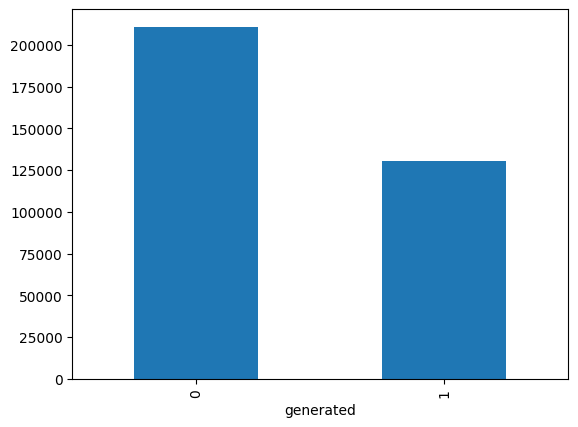

In [6]:
df.generated.value_counts().plot.bar()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
x=df.text
y=df.generated
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=44)
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier(n_estimators=100,max_depth=50)),])
text_clf.fit(x_train, y_train)  


predictions = text_clf.predict(x_test)

In [14]:
print(f'Score For Training {text_clf.score(x_train,y_train)}')
print(f'Score For Testing {text_clf.score(x_test,y_test)}')
print(f'Accuracy {accuracy_score(y_test,predictions)}')

Score For Training 0.9986356421864128
Score For Testing 0.9938310698285365
Accuracy 0.9938310698285365


<Axes: >

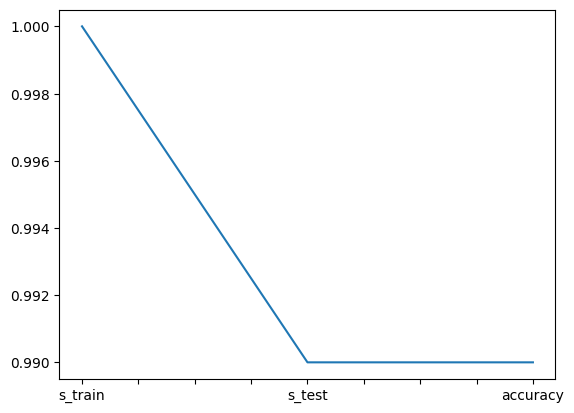

In [15]:

dic_ac={'s_train':text_clf.score(x_train,y_train).round(2),'s_test':text_clf.score(x_test,y_test).round(2),'accuracy':accuracy_score(y_test,predictions).round(2)}
pd.Series(dic_ac).plot()

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     52977
           1       1.00      0.98      0.99     32289

    accuracy                           0.99     85266
   macro avg       0.99      0.99      0.99     85266
weighted avg       0.99      0.99      0.99     85266



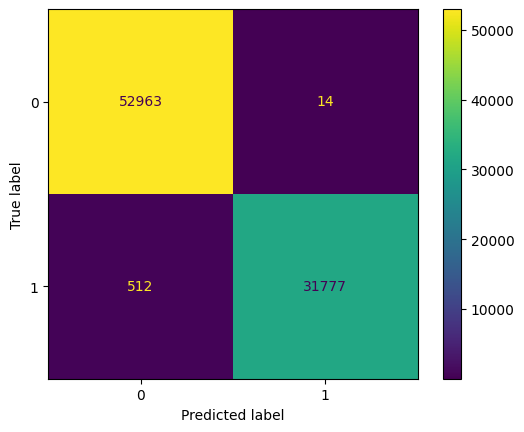

In [17]:
import matplotlib.pyplot as plt
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [18]:
test=pd.read_csv(r'/kaggle/input/human-vs-ai-text-classification-feb2024/test.csv')
test_pred=text_clf.predict(test.text)
#submission = pd.DataFrame({'Id': test['Id'], 'generated': test_pred})
#submission.to_csv('submission.csv', index=False)

In [21]:
submission = pd.DataFrame({'Id': test['Id'], 'generated': test_pred})
submission.to_csv('submission.csv', index=False)

In [36]:
import re
from gensim.parsing.preprocessing import remove_stopwords
df_analysis=df.copy()
df_analysis['NOfWords']=df_analysis.text.apply(lambda x:len(x.split()))
df_analysis['NOfCharacters']=df_analysis.text.apply(lambda x:len(x))
df_analysis['CountsOfNumbers']=df_analysis.text.apply(lambda x:len(re.findall(r'\d',x)))
df_analysis['NOfSCharacters']=df_analysis.text.apply(lambda x:re.search(r'["!@#$%^&*(){}[]:?]',x))
df_analysis['NOfEmails']=df_analysis.text.apply(lambda x:len(re.findall(r'[\w\.-]+@[\w\.-]+', x)))
df_analysis['NOfWUnique']=df_analysis.text.apply(lambda x:len(set(x)))
df_analysis['AfterRemoveStopWords']=df_analysis.text.apply(lambda x:remove_stopwords(x))

df_analysis.head()

,text,generated,NOfWords,NOfCharacters,CountsOfNumbers,NOfSCharacters,NOfEmails,NOfWUnique,AfterRemoveStopWords
0,Cars. Cars have been around since they became ...,0,584,3289,13,None,0,57,"Cars. Cars famous 1900s, Henry Ford created bu..."
1,Transportation is a large necessity in most co...,0,462,2738,16,None,0,57,Transportation large necessity countries world...
2,"""America's love affair with it's vehicles seem...",0,744,4428,0,None,0,47,"""America's love affair it's vehicles cooling"" ..."
3,How often do you ride in a car? Do you drive a...,0,686,4013,1,None,0,54,How ride car? Do drive motor vehicle work? The...
4,Cars are a wonderful thing. They are perhaps o...,0,871,4698,11,None,0,57,Cars wonderful thing. They worlds greatest adv...
